###  Homework 04

In [1]:
import os, shutil
import keras
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import optimizers
from keras.preprocessing import image

Using TensorFlow backend.


In [16]:
#original path to datasets 
original_dataset_dir = '/home/labina/Lectures/AdvanceDeepLearning/datasets/train'
 #the directory where we will store our smaller dataset
base_dir = '/home/labina/Lectures/AdvanceDeepLearning/datasets/cats_and_dogs_small'
os.mkdir(base_dir)

#Directories for our training,validation and tests splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

#directories with cat pictures
train_cat_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cat_dir)

#directories with dog pictures
train_dog_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dog_dir)

#directories with validation cat pictures
val_cat_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cat_dir)

#directories with validation dog pictures
val_dog_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dog_dir)

#directories with test cat pictures
test_cat_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cat_dir)

#directories with test dog pictures
test_dog_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dog_dir)

#copy 1000 images to train cat directory
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cat_dir, fname)
    shutil.copyfile(src, dst)
#copy next 500 images to validation cat directory 
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    scr = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_cat_dir, fname)
    shutil.copyfile(scr, dst)

#copy nect 500 cat images to test cat directory 
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    scr = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_cat_dir,fname)
    shutil.copyfile(scr, dst)
    
#copy 1000 images to train dog directory
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dog_dir, fname)
    shutil.copyfile(src, dst)
    
#copy next 500 images to validation dog directory 
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    scr = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_dog_dir, fname)
    shutil.copyfile(scr, dst)

#copy nect 500 dog images to test cat directory 
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    scr = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dog_dir,fname)
    shutil.copyfile(scr, dst)

In [17]:
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total test cat images:', len(os.listdir(test_cat_dir)))
print('total test dog images:', len(os.listdir(test_dog_dir)))
print('total validation cat images:', len(os.listdir(val_cat_dir)))
print('total validation dog images:', len(os.listdir(val_dog_dir)))

total training cat images: 1000
total training dog images: 1000
total test cat images: 500
total test dog images: 500
total validation cat images: 500
total validation dog images: 500


### DATA PREPROCESSING

In [2]:
#all images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

trainX= train_datagen.flow_from_directory(
    train_dir, 
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

testX_= test_datagen.flow_from_directory(
    test_dir, 
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

validationX = test_datagen.flow_from_directory(
    val_dir,
    target_size= (150,150),
    batch_size = 20,
    class_mode = 'binary')

#for data_batch, labels_batch in train_generator:
   # print('data batch shape:', data_batch.shape)
  # print('labels batch shape:', labels_batch.shape)

NameError: name 'train_dir' is not defined

### TEST 1: TEXTBOOK WITHOUT DATA AGUMENTATION 
<b>Maximum Training Accuracy: 0.991 Maximum Validation Accuracy 0.7350000143051147<b>

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape =(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [29]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/30
100/100 [==============================] - 25s 252ms/step - loss: 0.6901 - acc: 0.5525 - val_loss: 0.6940 - val_acc: 0.6270
Epoch 2/30
100/100 [==============================] - 25s 248ms/step - loss: 0.6596 - acc: 0.5985 - val_loss: 0.7322 - val_acc: 0.5780
Epoch 3/30
100/100 [==============================] - 25s 249ms/step - loss: 0.6211 - acc: 0.6555 - val_loss: 0.6870 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 25s 249ms/step - loss: 0.5700 - acc: 0.7065 - val_loss: 0.4478 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 25s 250ms/step - loss: 0.5328 - acc: 0.7325 - val_loss: 0.5244 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 25s 249ms/step - loss: 0.5098 - acc: 0.7430 - val_loss: 0.4779 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 25s 249ms/step - loss: 0.4841 - acc: 0.76

In [35]:
def plot(history):
    plt.figure(figsize = (10,5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label = 'Training loss')
    plt.plot(history['val_loss'], label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['acc'], label = 'Training accuracy')
    plt.plot(history['val_acc'], label = 'Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()
    
    print('Maximum Training Accuracy:',max(history['acc']), 'Maximum Validation Accuracy', max(history['val_acc']))

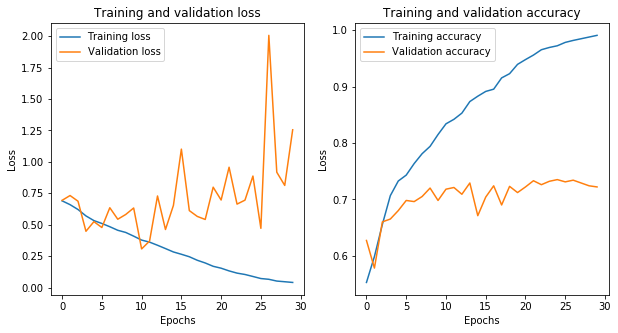

Maximum Training Accuracy: 0.991 Maximum Validation Accuracy 0.7350000143051147


In [36]:
plot(history.history)

### TEST 02:DATA AGUMENTATION : TO REDUCE OVERFITTING 
#### TEST ACCURACY : 0.72

In [3]:
train_datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [4]:
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator= test_datagen.flow_from_directory(
    test_dir, 
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

NameError: name 'train_dir' is not defined

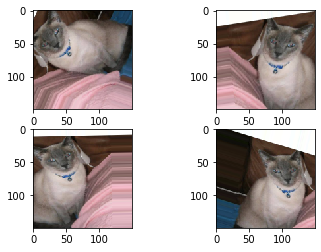

In [98]:
fnames =[os.path.join(train_cat_dir,fname) for fname in os.listdir(train_cat_dir)]
#pick one image to "augment"
img_path = fnames[4]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x =x.reshape((1,)+x.shape)
i = 0
for batch in train_datagen.flow(x, batch_size =1):
    #plt.figure(figsize=(10,10))
    ax = plt.subplot(2,2,i+1)
    #plt.figure(figsize=(10,10))
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i%4 ==0:
        break; 
plt.show()

In [70]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 39s 391ms/step - loss: 5.8011e-09 - acc: 1.0000 - val_loss: 4.1117 - val_acc: 0.7297
Epoch 2/10
100/100 [==============================] - 39s 389ms/step - loss: 3.4737e-09 - acc: 1.0000 - val_loss: 2.3306 - val_acc: 0.7384
Epoch 3/10
100/100 [==============================] - 40s 397ms/step - loss: 2.8606e-09 - acc: 1.0000 - val_loss: 3.5559 - val_acc: 0.7240
Epoch 4/10
100/100 [==============================] - 40s 404ms/step - loss: 2.2312e-09 - acc: 1.0000 - val_loss: 3.3687 - val_acc: 0.7390
Epoch 5/10
100/100 [==============================] - 40s 395ms/step - loss: 2.1739e-09 - acc: 1.0000 - val_loss: 2.5482 - val_acc: 0.7367
Epoch 6/10
100/100 [==============================] - 39s 391ms/step - loss: 1.8083e-09 - acc: 1.0000 - val_loss: 3.7784 - val_acc: 0.7307
Epoch 7/10
100/100 [==============================] - 40s 399ms/step - loss: 1.7239e-09 - acc: 1.0000 - val_loss: 4.0203 - val_acc: 0.7348
Epoch 8/10
100/100 [=======

In [71]:
model.save("cats_and_dogs_small1.h5")

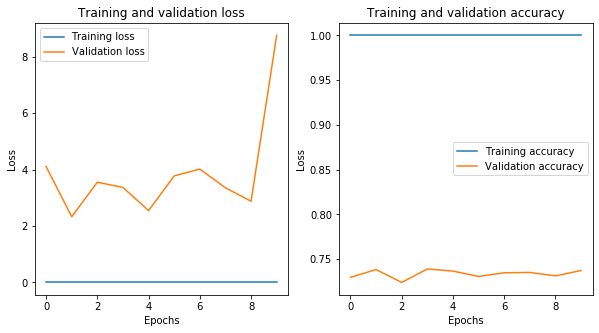

Maximum Training Accuracy: 1.0 Maximum Validation Accuracy 0.7390463948249817


In [72]:
plot(history.history)

In [73]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

In [74]:
print('test acc:', test_acc)

test acc: 0.7233502268791199


### TEST03: TRYING TO TEST WITH PRETRAINED WEIGHTS OF XCEPTION 
#### FROM : https://keras.io/guides/transfer_learning/
# TEST  Accuracy gain by : 0.96 [BEST!!!!]

In [1]:
base_model = keras.applications.Xception(
    weights = "imagenet",
    input_shape =(150,150,3),
    include_top = False,
)
#freezing the base modela
base_model.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

NameError: name 'keras' is not defined

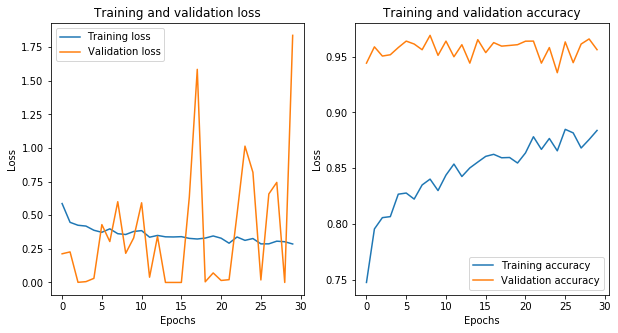

Maximum Training Accuracy: 0.88478535 Maximum Validation Accuracy 0.969072163105011


In [102]:
plot(history.history)

In [103]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

In [104]:
print('test acc:', test_acc)

test acc: 0.9638324975967407


### TEST 04: Unfreeze the base_model. Note that it keeps running in inference mode
### since we passed `training=False` when calling it. This means that the batchnorm layers will not update their batch statistics.
### This prevents the batchnorm layers from undoing all the training
## Test Accuracy = 0.49

In [108]:
base_model.trainable = True
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               13107456  
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 13,162,241
Trainable params: 13,107,713
Non-trainable params: 54,528
_________________________________________________________________


/home/labina/anaconda3/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [109]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 356s 4s/step - loss: 0.2907 - acc: 0.8851 - val_loss: 27.1245 - val_acc: 0.5013
Epoch 2/30
100/100 [==============================] - 352s 4s/step - loss: 0.2160 - acc: 0.9189 - val_loss: 11.9130 - val_acc: 0.4994
Epoch 3/30
100/100 [==============================] - 359s 4s/step - loss: 0.1602 - acc: 0.9397 - val_loss: 7.8989 - val_acc: 0.4937
Epoch 4/30
100/100 [==============================] - 341s 3s/step - loss: 0.1407 - acc: 0.9510 - val_loss: 8.3157 - val_acc: 0.5077
Epoch 5/30
100/100 [==============================] - 344s 3s/step - loss: 0.1027 - acc: 0.9593 - val_loss: 11.8375 - val_acc: 0.4911
Epoch 6/30
100/100 [==============================] - 345s 3s/step - loss: 0.1123 - acc: 0.9624 - val_loss: 0.8341 - val_acc: 0.4890
Epoch 7/30
100/100 [==============================] - 352s 4s/step - loss: 0.0880 - acc: 0.9746 - val_loss: 4.7002 - val_acc: 0.4924
Epoch 8/30
100/100 [==============================] - 355s 4s/step

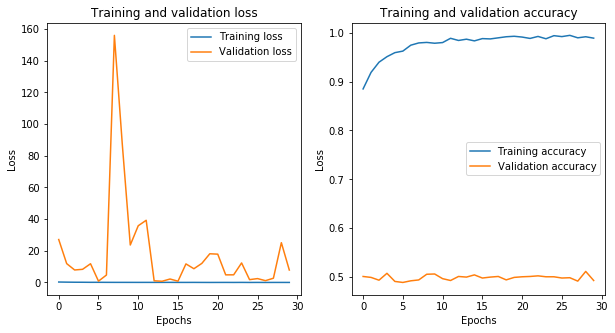

Maximum Training Accuracy: 0.9946608 Maximum Validation Accuracy 0.5115979313850403


In [110]:
plot(history.history)

In [111]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('Test accuracy:', test_acc)

Test accuracy: 0.49302029609680176


### TEST 05
### Training using inception_v3 as base model and increasing the model layers using training data wuthout data agumentation
### Test accuracy: 0.95

In [125]:
base_model = keras.applications.InceptionV3(
    weights = "imagenet",
    input_shape =(150,150,3),
    include_top = False,
)
#freezing the base model
base_model.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      trainX,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validationX,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 39s 389ms/step - loss: 0.5655 - acc: 0.7370 - val_loss: 2.0149 - val_acc: 0.6770
Epoch 2/30
100/100 [==============================] - 35s 350ms/step - loss: 0.3970 - acc: 0.8220 - val_loss: 1.3706 - val_acc: 0.8090
Epoch 3/30
100/100 [==============================] - 35s 350ms/step - loss: 0.3441 - acc: 0.8485 - val_loss: 0.5266 - val_acc: 0.9360
Epoch 4/30
100/100 [==============================] - 34s 341ms/step - loss: 0.3205 - acc: 0.8680 - val_loss: 0.1216 - val_acc: 0.9410
Epoch 5/30
100/100 [==============================] - 34s 340ms/step - loss: 0.2871 - acc: 0.8840 - val_loss: 0.0712 - val_acc: 0.9340
Epoch 6/30
100/100 [==============================] - 34s 345ms/step - loss: 0.2416 - acc: 0.9040 - val_loss: 0.6822 - val_acc: 0.9100
Epoch 7/30
100/100 [==============================] - 35s 353ms/step - loss: 0.2272 - acc: 0.9065 - val_loss: 0.0057 - val_acc: 0.9440
Epoch 8/30
100/100 [==============================] - 3

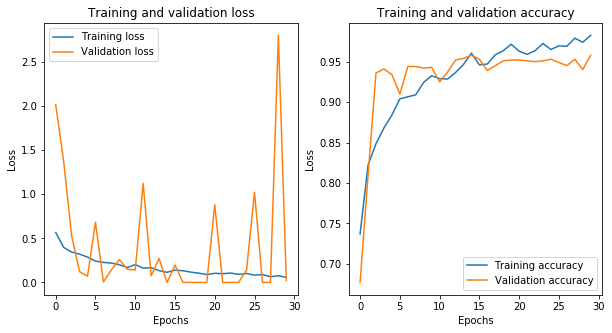

Maximum Training Accuracy: 0.9825 Maximum Validation Accuracy 0.9580000042915344
Test accuracy: 0.953045666217804


In [127]:
plot(history.history)
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('Test accuracy:', test_acc)

In [128]:
base_model.trainable = False
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50, verbose=0)

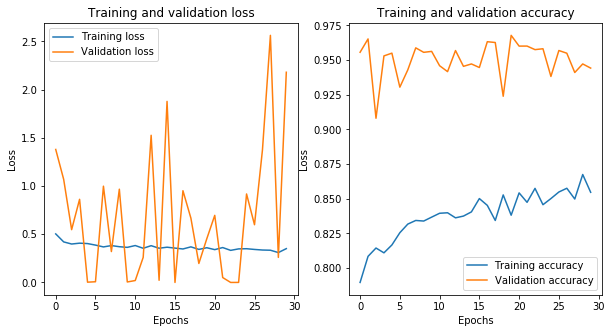

Maximum Training Accuracy: 0.86742425 Maximum Validation Accuracy 0.967783510684967


In [129]:
plot(history.history)

In [130]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('Test accuracy:', test_acc)

Test accuracy: 0.9524111747741699


### TEST 07: Unfreeze the base_model
### Test accuracy: 0.92

In [131]:
base_model = keras.applications.InceptionV3(
    weights = "imagenet",
    input_shape =(150,150,3),
    include_top = False,
)
#freezing the base model
base_model.trainable = True

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      trainX,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validationX,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 122s 1s/step - loss: 0.4653 - acc: 0.8000 - val_loss: 0.0885 - val_acc: 0.9300
Epoch 2/30
100/100 [==============================] - 112s 1s/step - loss: 0.1496 - acc: 0.9475 - val_loss: 3.7671e-04 - val_acc: 0.9140
Epoch 3/30
100/100 [==============================] - 115s 1s/step - loss: 0.0859 - acc: 0.9700 - val_loss: 0.0052 - val_acc: 0.9380
Epoch 4/30
100/100 [==============================] - 112s 1s/step - loss: 0.0820 - acc: 0.9755 - val_loss: 0.0027 - val_acc: 0.9420
Epoch 5/30
100/100 [==============================] - 109s 1s/step - loss: 0.0429 - acc: 0.9840 - val_loss: 0.0271 - val_acc: 0.9270
Epoch 6/30
100/100 [==============================] - 109s 1s/step - loss: 0.0471 - acc: 0.9845 - val_loss: 0.0233 - val_acc: 0.9390
Epoch 7/30
100/100 [==============================] - 118s 1s/step - loss: 0.0304 - acc: 0.9920 - val_loss: 0.9567 - val_acc: 0.9050
Epoch 8/30
100/100 [==============================] - 111s 1s/ste

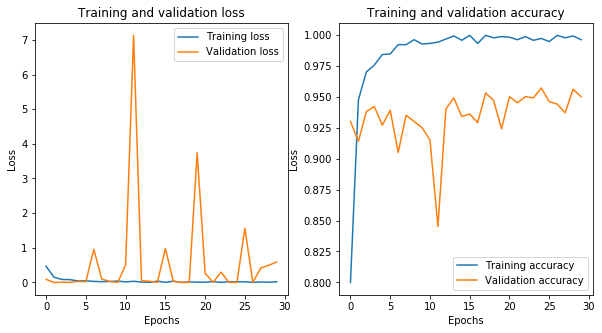

Maximum Training Accuracy: 0.9995 Maximum Validation Accuracy 0.9570000171661377


In [132]:
plot(history.history)

In [133]:
test_loss, test_acc = model.evaluate_generator(testX, steps=50)
print('Test accuracy:', test_acc)

Test accuracy: 0.9282994866371155


### TEST 07: freeze the base_model with data agumentation 
### Test accuracy: 0.95

In [119]:
base_model = keras.applications.InceptionV3(
    weights = "imagenet",
    input_shape =(150,150,3),
    include_top = False,
)
#freezing the base model
base_model.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 56s 563ms/step - loss: 0.6851 - acc: 0.6544 - val_loss: 0.1937 - val_acc: 0.9201
Epoch 2/30
100/100 [==============================] - 53s 529ms/step - loss: 0.5310 - acc: 0.7279 - val_loss: 0.4582 - val_acc: 0.8789
Epoch 3/30
100/100 [==============================] - 53s 532ms/step - loss: 0.4881 - acc: 0.7695 - val_loss: 0.0428 - val_acc: 0.9569
Epoch 4/30
100/100 [==============================] - 53s 528ms/step - loss: 0.4876 - acc: 0.7732 - val_loss: 0.0303 - val_acc: 0.9407
Epoch 5/30
100/100 [==============================] - 53s 529ms/step - loss: 0.4477 - acc: 0.7850 - val_loss: 0.2755 - val_acc: 0.9416
Epoch 6/30
100/100 [==============================] - 53s 533ms/step - loss: 0.4361 - acc: 0.7915 - val_loss: 0.3358 - val_acc: 0.9220
Epoch 7/30
100/100 [==============================] - 53s 529ms/step - loss: 0.4392 - acc: 0.7958 - val_loss: 0.5352 - val_acc: 0.9543
Epoch 8/30
100/100 [==============================] - 5

In [121]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('Test accuracy:', test_acc)

Test accuracy: 0.9517766237258911


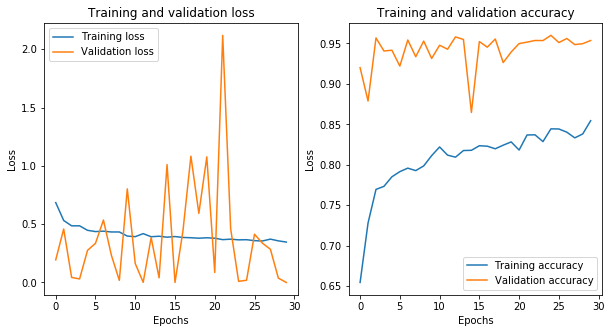

Maximum Training Accuracy: 0.85448235 Maximum Validation Accuracy 0.9600515365600586


In [120]:
plot(history.history)